# Introduction to Climate Science
Welcome to the Coding Foundations of Research (CFR) module on Climate Science! In the next three weeks we'll learn about Earth's climate system, climate modeling, and working with multi-demensional datasets.

## What is Climate Science?
Climate science is the study of the climate system of the earth with emphasis on the physical, dynamical, and chemical interactions of the atmosphere, ocean, land, ice, and the terrestrial and marine biospheres. The field encompasses changes on seasonal to interannual time scales and those induced by human activities, as well as paleoclimatic changes on time scales from centuries to millions of years.

### Weather vs. Climate
**Weather** refers to atmospheric conditions that occur locally over short periods of time—from minutes to hours or days. Familiar examples include rain, snow, clouds, winds, floods, or thunderstorms.

**Climate**, refers to the long-term (usually at least 30 years) regional or even global average of temperature, humidity, and rainfall patterns over seasons, years, or decades.

### [The Climate System](https://scied.ucar.edu/learning-zone/earth-system/climate-system)
The Earth's Climate system consists of interacting **components**. These are:
* **Sun**: All energy in the Earth’s climate system originates from the Sun. The Sun constantly provides the top of our atmosphere with an average of 342 Watts per square meter of energy.
* **Atmosphere**: the air and clouds above the surface of the Earth. The atmosphere is about 10 km thick (more than two thirds of its mass is
contained below that height).
* **Ocean**: the bodies of water that cover more than two thirds of the Earth's surface. The ocean has an average depth of 4km.
* **Cryosphere**: includes sea ice, mountain glaciers and ice sheets on land. *Sea ice* is frozen sea water, up to several meters thick, floating on the ocean. *Ice sheets* on land, made out of compressed snow, can be several kilometers thick.
* **Biosphere**: all living things on land and in the oceans. This includes microscopic microbes, plants, animals, and even humans.
* **Lithosphere**: the solid Earth (upper crust and mantle), could also be considered an active part of Earth’s climate sytem because it responds to ice load and impacts atmospheric carbon dioxide (CO2) concentrations and climate on long timescales through the movements of
the continents.

![IPCC AR4 FAQ Components of Earth's climate system](https://scied.ucar.edu/sites/default/files/styles/extra_large/public/media/images/faq-1-2-figure-1-l.png.webp?itok=s3UvRv-s)

The components of the climate system, their processes, and interactions. This includes the atmosphere, biosphere (life), cryosphere (ice), hydrosphere (water), land and human influences, and the interactions between these components (shown with two-way arrows). The parts of the system that can change are labeled as "Changes".

## Why study Earth's climate?

*Poll the class*

## [How do we study Earth's Climate?](https://scied.ucar.edu/learning-zone/how-climate-works/researching-climate-change)

* **Direct measurements**
    * in-situ measurements (i.e. on the ground, in the air, in the ocean, on/in ice)
    * data from satellites in space
    * instruments on the International Space Station
* **[In-direct measurements](https://climate.nasa.gov/explore/evidence-for-earths-past-climate/)**
    * *Biological proxies*: geologically preserved organisms (such as diatoms, forams, and coral), tree rings
    * *Physcial proxies*: ice cores, sediment cores
    * *Chemical proxies*: isotope ratios, elemental analyses, biomarkers, biogenic silica
* **Theory and Simple Models**
* **Complex Models (Computer Simulations)**
* **Laboratory Experiments**

## Earth's Global Average Surface Temperature, a key climate indicator (1850-2023)
The average temperature of the surface of the Earth is a powerful tool for quantifying Earth's climate and has profound impacts on human, biological, and physical systems. So what sets the mean surface temperature of the Earth?

Let's start by looking at [a record of Earth's average surface temperature](https://berkeleyearth.org/data/) to see what the recent climate has looked like.

In [103]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
# load data
fname_in = '../data/GAST_BerkeleyEarth_1850-2023.csv'
gast = pd.read_csv(fname_in)

In [105]:
gast

,Year,Month,Monthly Average,Monthly Anomaly Uncertainty
0,1850,1,11.440,0.404
1,1850,2,12.197,0.524
2,1850,3,12.666,0.449
3,1850,4,13.345,0.304
4,1850,5,14.288,0.249
...,...,...,...,...
2083,2023,8,17.092,0.047
2084,2023,9,16.736,0.040
2085,2023,10,15.644,0.046
2086,2023,11,14.642,0.050


We'll add a datetime column to make using Pandas a little easier

In [106]:
gast['Time'] = pd.to_datetime(gast[['Year','Month']].assign(Day=1))

In [107]:
df = gast.set_index('Time')[['Monthly Average','Monthly Anomaly Uncertainty']]

The dataframe `df` now holds the *time series* of monthly averaged global average surface temperature of Earth. A time series is a series of values of a quantity obtained at successive times, often with equal intervals between them.

**Plot the time series of the monthly averaged global average surface temperature of Earth.**

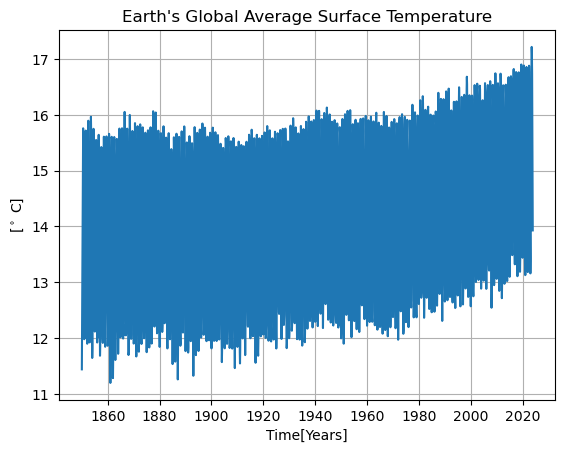

In [108]:
# plot the monthly average gast
plt.plot(df.index,df['Monthly Average'])
plt.ylabel(r'[$^\circ$ C]')
plt.xlabel('Time[Years]')
plt.title('Earth\'s Global Average Surface Temperature')
plt.grid()
plt.show()

What do you notice?

[put your notes here]

Let's make the plot again but overlay a rolling average of the monthly data so we get a sense of the record if that doesn't include the anual cycle of Earth's global average surface temperature

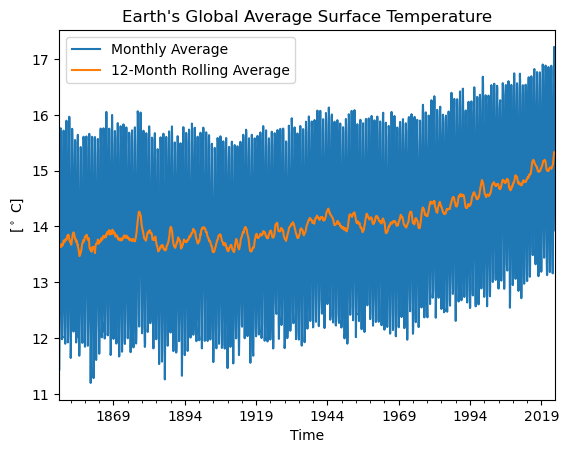

In [109]:
# plot the monthly average gast with rolling average
df['Monthly Average'].plot(label='Monthly Average')
df['Monthly Average'].rolling(12, center=True).mean().plot(label='12-Month Rolling Average')
plt.ylabel(r'[$^\circ$ C]')
plt.title('Earth\'s Global Average Surface Temperature')
plt.legend()
plt.show()

It can be useful to look at longer averages of the temperature record that average over the annual cycle of the temperature record, which is related to natural cycles in Earth's climate system. Let's make a new time series that is the average GAST for each year in the reccord.

In [110]:
annual_average = df.groupby(df.index.year).mean()

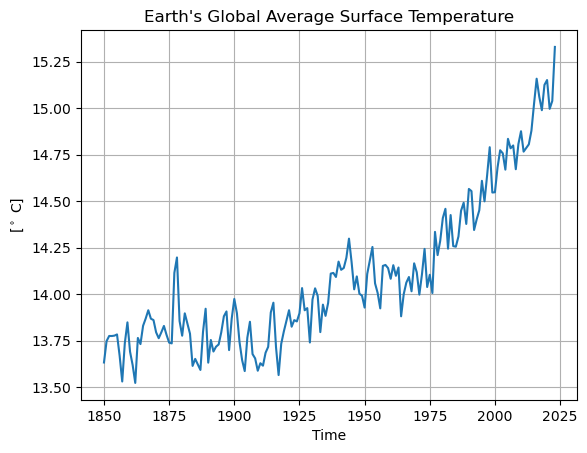

In [101]:
annual_average['Monthly Average'].plot()
plt.ylabel(r'[$^\circ$ C]')
plt.title('Earth\'s Global Average Surface Temperature')
plt.grid()
plt.show()

### Assignment

Visualize, in your own way how the Earth's climate has evolved over the 1850-2023 time period. Remember that climate referes to a long-term average, usually over 30 years in length. You may chose to do this with line plots, histograms, bar charts. You can use the monthly or annually averaged dataset, or both. Add notes about why you chose your particular visualization. What kind of question did you want to answer?

In [102]:
# Function to plot histogram of monthly average temperature anomalies for a specific range of years
def plot_histogram(gast, start_year, end_year):
    # Filter data for the specified range of years
    gast_filtered = gast[(gast['Year'] >= start_year) & (gast['Year'] <= end_year)]
    
    # Histogram of monthly average temperature anomalies
    plt.figure(figsize=(10, 6))
    plt.hist(gast_filtered['Monthly Average'], bins=30, edgecolor='black')
    plt.title(f'Distribution of Monthly Average Temperature Anomalies ({start_year}-{end_year})')
    plt.xlabel('Monthly Average Temperature Anomaly (°C)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example: Plotting for the period 1950-2000
plot_histogram(gast, 1950, 1990) plot_histogram(gast, start_year, end_year)
#Fiter data for specified years
gast_filtered = gast(gast['Year'] >= start_year, (gast['Year'], <= end_year])



SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (2080969512.py, line 19)

In [111]:
 #Function to plot histogram of monthly average temperature anomalies for a specific range of years
def plot_histogram(gast, start_year, end_year):
    # Filter data for the specified range of years
    gast_filtered = gast[(gast['Year'] >= start_year) & (gast['Year'] <= end_year)]
    
    # Histogram of monthly average temperature anomalies
    plt.figure(figsize=(10, 6))
    plt.hist(gast_filtered['Monthly Average'], bins=30, edgecolor='black')
    plt.title(f'Distribution of Monthly Average Temperature Anomalies ({start_year}-{end_year})')
    plt.xlabel('Monthly Average Temperature Anomaly (°C)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

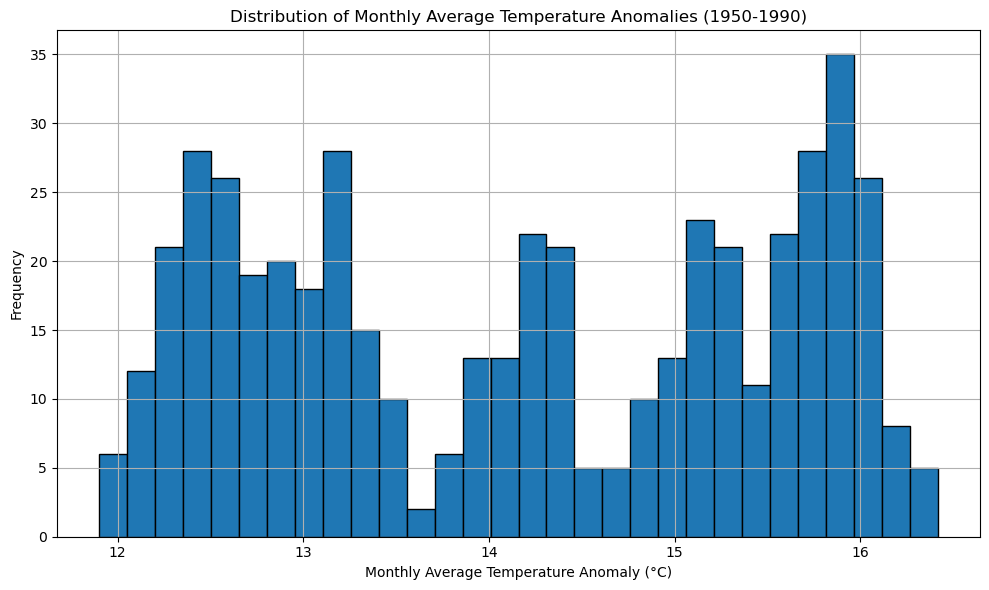

In [112]:
# Example: Plotting for the period 1950-2000
plot_histogram(gast, 1950, 1990)

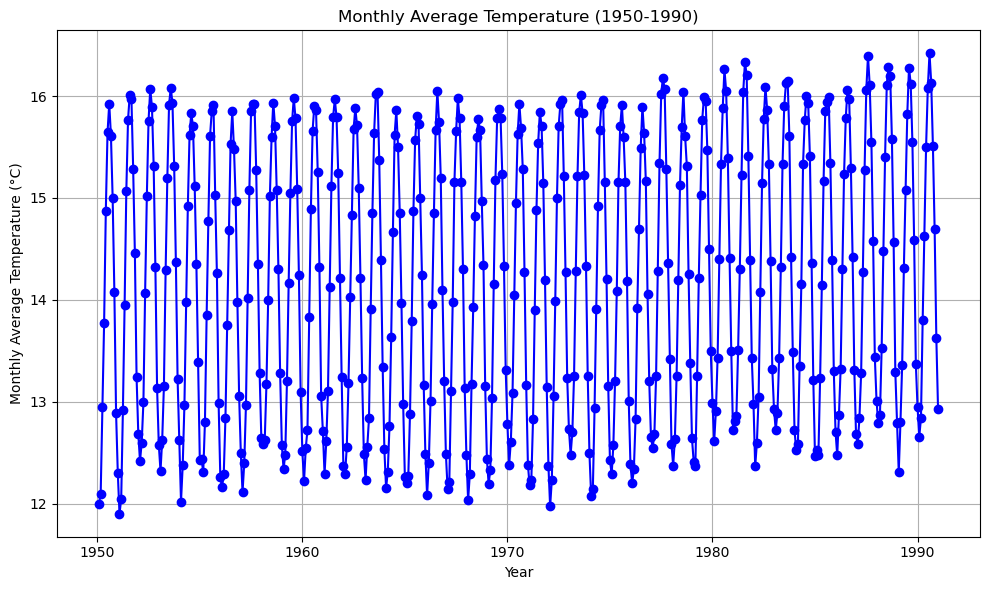

In [113]:
start_year = 1950
end_year = 1990
gast_filtered = gast[(gast['Year'] >= start_year) & (gast['Year'] <= end_year)]

# Line plot of monthly average temperatures
plt.figure(figsize=(10, 6))
plt.plot(gast_filtered['Year'] + gast_filtered['Month'] / 12, gast_filtered['Monthly Average'], marker='o', linestyle='-', color='b')
plt.title(f'Monthly Average Temperature ({start_year}-{end_year})')
plt.xlabel('Year')
plt.ylabel('Monthly Average Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

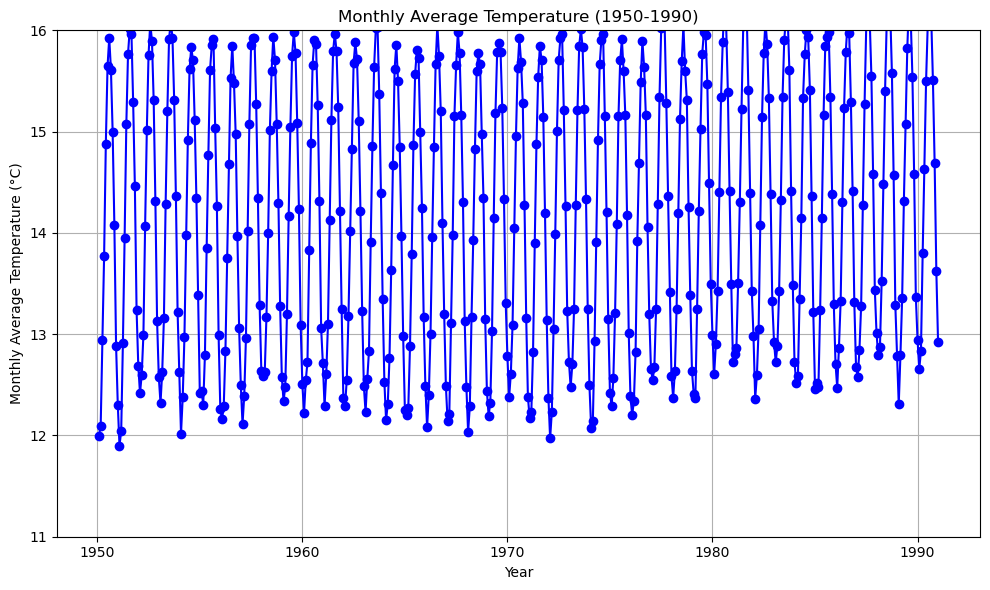

In [114]:
# Line plot of monthly average temperatures
plt.figure(figsize=(10, 6))
plt.plot(gast_filtered['Year'] + gast_filtered['Month'] / 12, gast_filtered['Monthly Average'], marker='o', linestyle='-', color='b')
plt.title(f'Monthly Average Temperature ({start_year}-{end_year})')
plt.xlabel('Year')
plt.ylabel('Monthly Average Temperature (°C)') 
plt.ylim(11,16)
plt.grid(True)
plt.tight_layout()
plt.show()

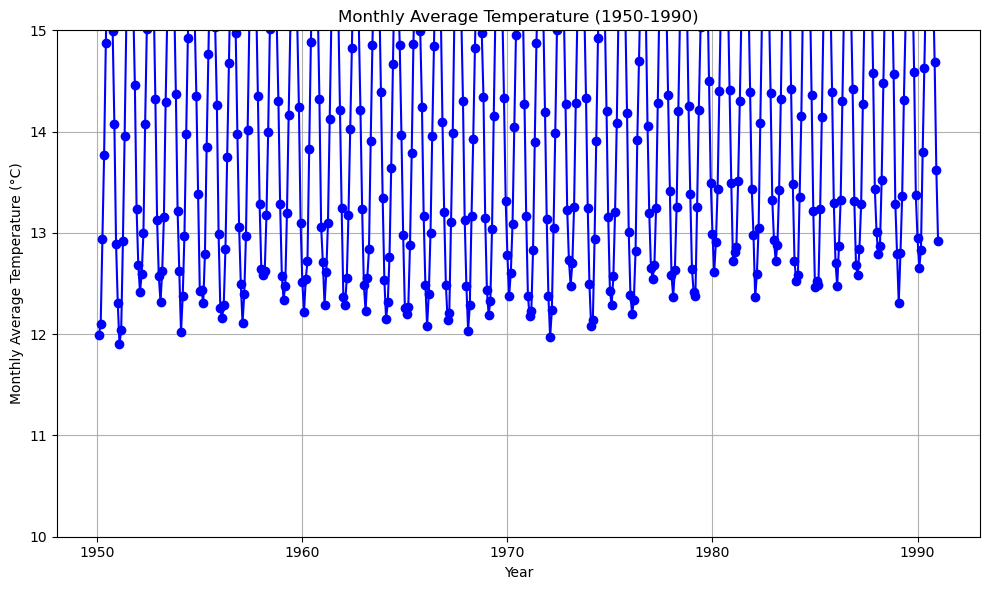

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(gast_filtered['Year'] + gast_filtered['Month'] / 12, gast_filtered['Monthly Average'], marker='o', linestyle='-', color='b')
plt.title(f'Monthly Average Temperature ({start_year}-{end_year})')
plt.xlabel('Year')
plt.ylabel('Monthly Average Temperature (°C)')
plt.ylim(10, 15)
plt.grid(True)
plt.tight_layout()
plt.show()

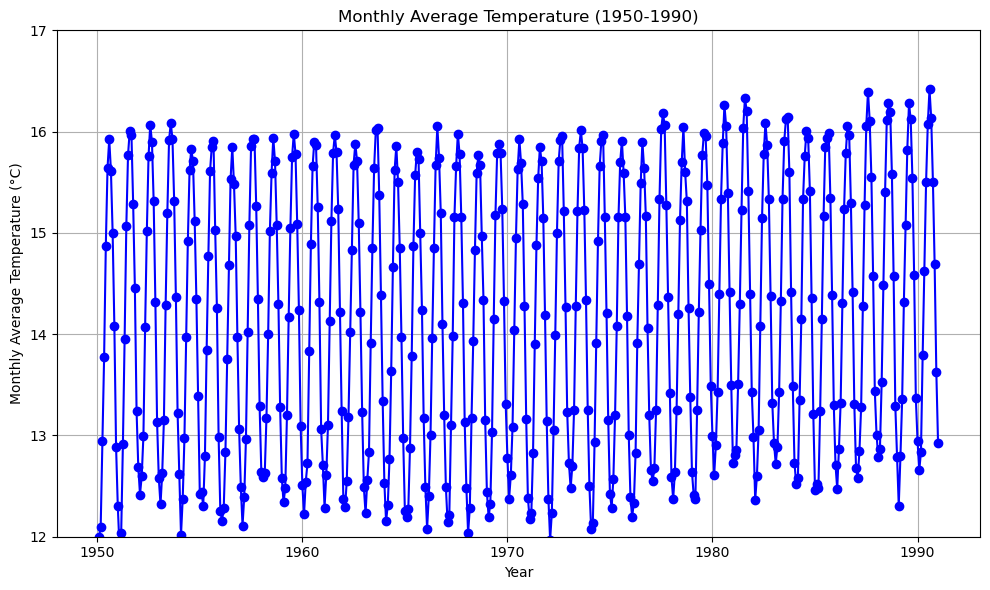

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(gast_filtered['Year'] + gast_filtered['Month'] / 12, gast_filtered['Monthly Average'], marker='o', linestyle='-', color='b')
plt.title(f'Monthly Average Temperature ({start_year}-{end_year})')
plt.xlabel('Year')
plt.ylabel('Monthly Average Temperature (°C)')
plt.ylim(12, 17)
plt.grid(True)
plt.tight_layout()
plt.show()

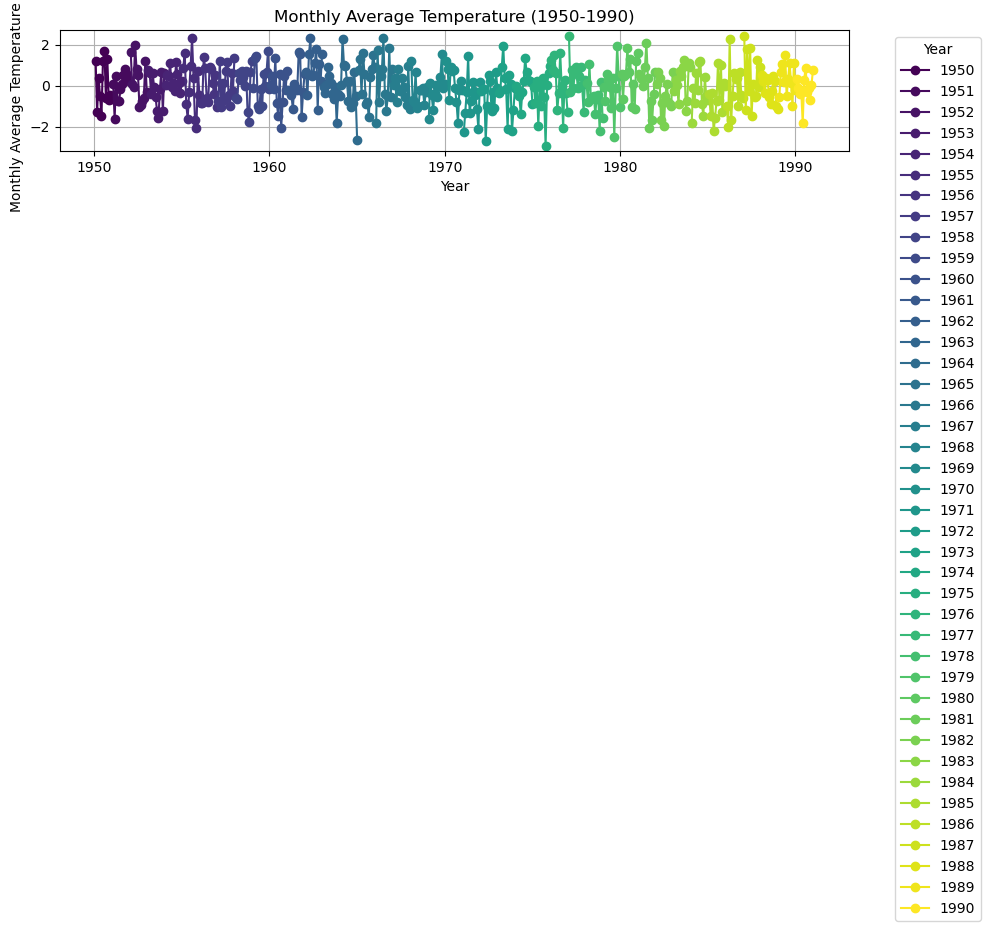

In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data creation
data = {
    'Year': np.repeat(np.arange(1950, 1991), 12),
    'Month': np.tile(np.arange(1, 13), 41),
    'Monthly Average': np.random.randn(492)  # Random data for demonstration
}

gast = pd.DataFrame(data)

# Parameters
start_year = 1950
end_year = 1990

# Filter data for the specified range of years
gast_filtered = gast[(gast['Year'] >= start_year) & (gast['Year'] <= end_year)]

# Line plot of monthly average temperatures
plt.figure(figsize=(10, 6))

# Define colors for each year
colors = plt.cm.viridis(np.linspace(0, 1, end_year - start_year + 1))

# Plot each year's data with a different color
for i, (year, group) in enumerate(gast_filtered.groupby('Year')):
    plt.plot(group['Year'] + group['Month'] / 12, group['Monthly Average'], marker='o', linestyle='-', color=colors[i], label=str(year))

plt.title(f'Monthly Average Temperature ({start_year}-{end_year})')
plt.xlabel('Year')
plt.ylabel('Monthly Average Temperature (°C)')
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


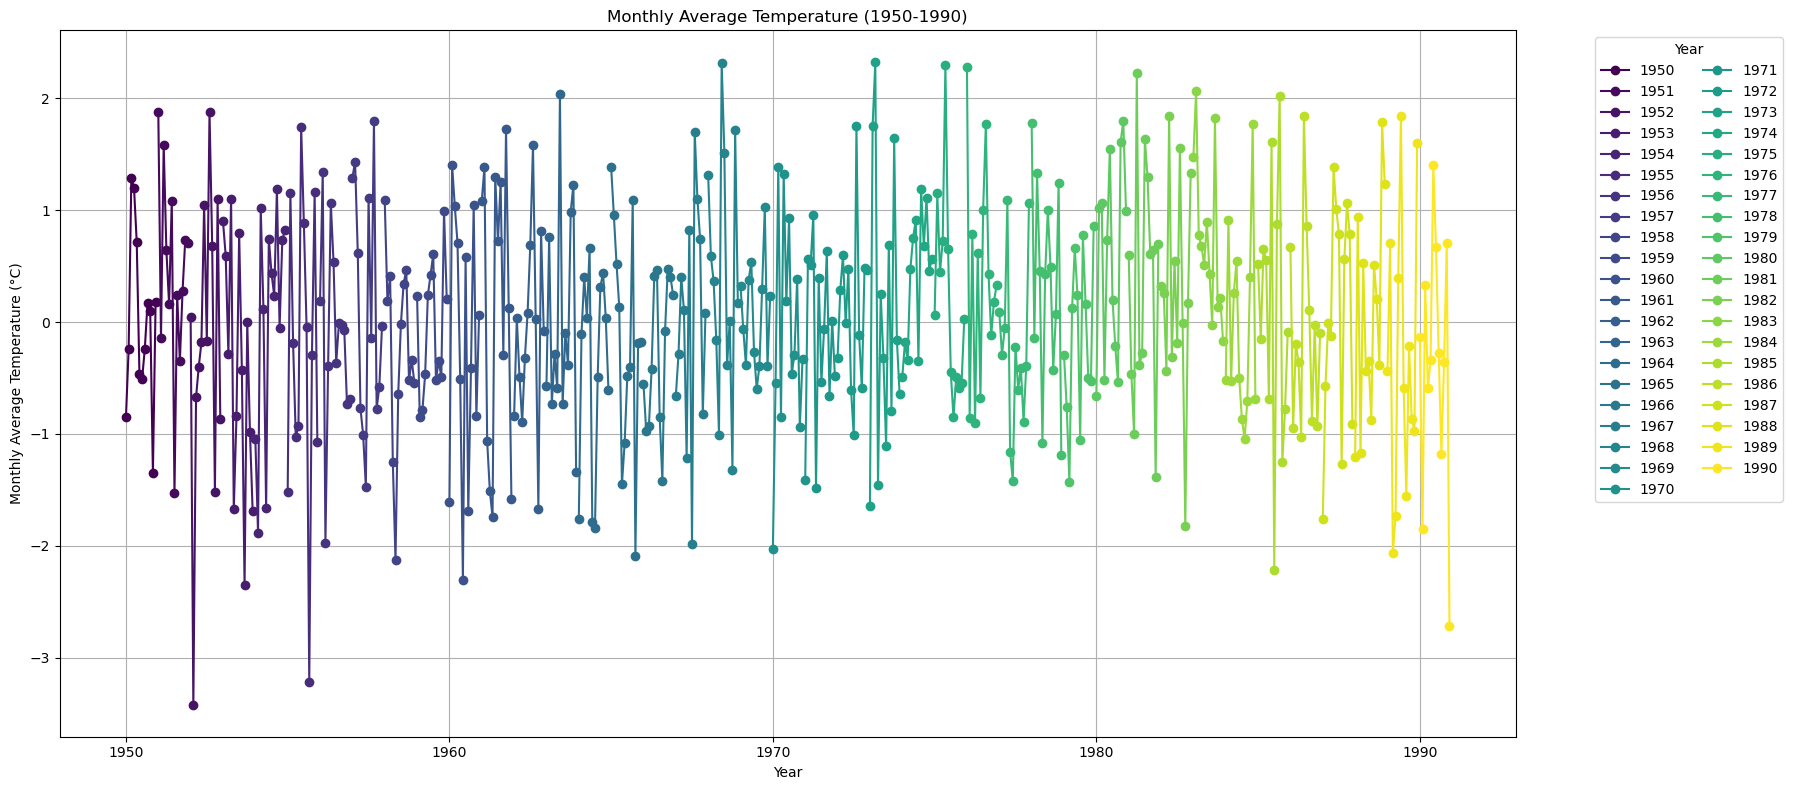

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data creation
data = {
    'Year': np.repeat(np.arange(1950, 1991), 12),
    'Month': np.tile(np.arange(1, 13), 41),
    'Monthly Average': np.random.randn(492)  # Random data for demonstration
}

gast = pd.DataFrame(data)

# Parameters
start_year = 1950
end_year = 1990

# Filter data for the specified range of years
gast_filtered = gast[(gast['Year'] >= start_year) & (gast['Year'] <= end_year)]

# Line plot of monthly average temperatures
plt.figure(figsize=(18, 8))  # Increased figure size for better visibility

# Define colors for each year
colors = plt.cm.viridis(np.linspace(0, 1, end_year - start_year + 1))

# Plot each year's data with a different color
for i, (year, group) in enumerate(gast_filtered.groupby('Year')):
    plt.plot(group['Year'] + (group['Month'] - 1) / 12, group['Monthly Average'], 
             marker='o', linestyle='-', color=colors[i], label=str(year))

plt.title(f'Monthly Average Temperature ({start_year}-{end_year})')
plt.xlabel('Year')
plt.ylabel('Monthly Average Temperature (°C)')
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)  # Adjusted legend position
plt.tight_layout()
plt.show()


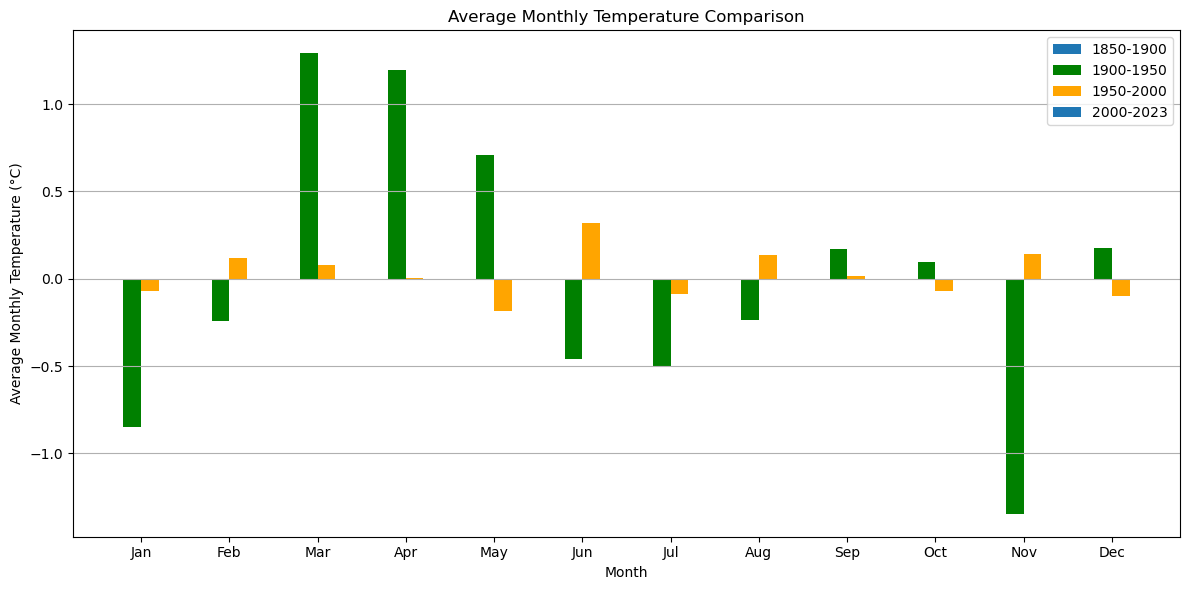

In [119]:
# Function to plot bar chart of average monthly temperatures for different time periods
def plot_monthly_comparison(gast):
    # Filter data for each time period
    gast_1850_1900 = gast[(gast['Year'] >= 1850) & (gast['Year'] <= 1900)]
    gast_1900_1950 = gast[(gast['Year'] >= 1900) & (gast['Year'] <= 1950)]
    gast_1950_2000 = gast[(gast['Year'] >= 1950) & (gast['Year'] <= 2000)]
    gast_2000_2023 = gast[(gast['Year'] >= 2000) & (gast['Year'] <= 2023)]
    
    # Calculate average monthly temperatures for each time period
    monthly_means_1850_1900 = gast_1850_1900.groupby('Month')['Monthly Average'].mean()
    monthly_means_1900_1950 = gast_1900_1950.groupby('Month')['Monthly Average'].mean()
    monthly_means_1950_2000 = gast_1950_2000.groupby('Month')['Monthly Average'].mean()
    monthly_means_2000_2023 = gast_2000_2023.groupby('Month')['Monthly Average'].mean()
    
    # Plotting the bar chart
    plt.figure(figsize=(12, 6))
    
    # Plotting each time period with different colors
    plt.bar(monthly_means_1850_1900.index - 0.3, monthly_means_1850_1900.values, width=0.2, color='blue', label='1850-1900')
    plt.bar(monthly_means_1900_1950.index - 0.1, monthly_means_1900_1950.values, width=0.2, color='green', label='1900-1950')
    plt.bar(monthly_means_1950_2000.index + 0.1, monthly_means_1950_2000.values, width=0.2, color='orange', label='1950-2000')
    plt.bar(monthly_means_2000_2023.index + 0.3, monthly_means_2000_2023.values, width=0.2, color='red', label='2000-2023')
    
    # Customizing the plot
    plt.title('Average Monthly Temperature Comparison')
    plt.xlabel('Month')
    plt.ylabel('Average Monthly Temperature (°C)')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Example: Plotting the comparison for all time periods
plot_monthly_comparison(gast)

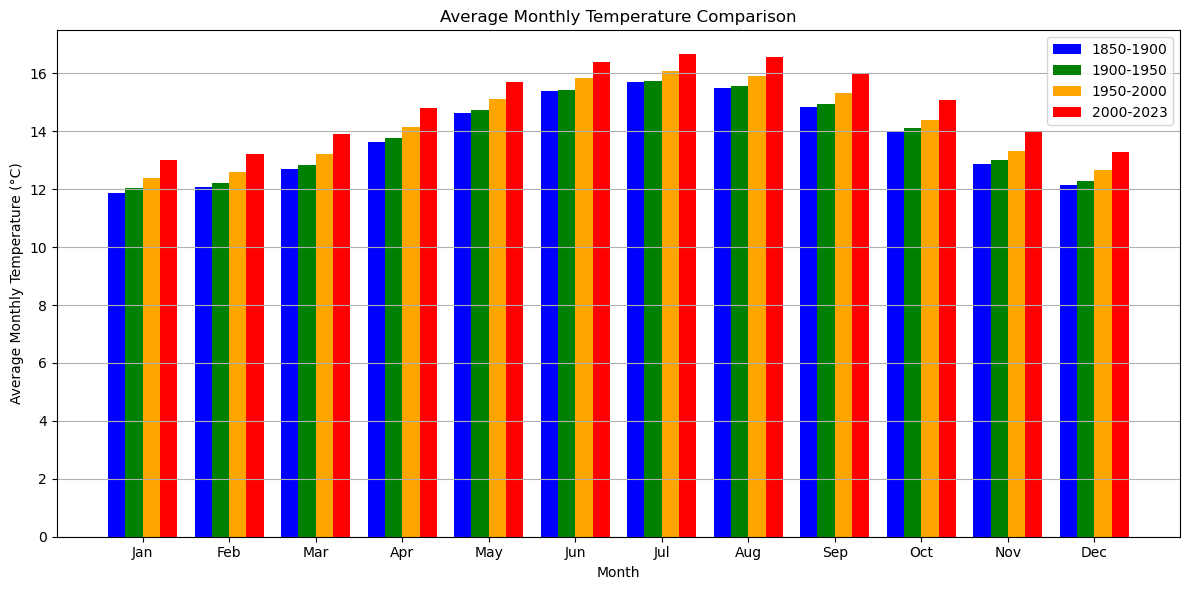

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the data
fname_in = '../data/GAST_BerkeleyEarth_1850-2023.csv'
gast = pd.read_csv(fname_in)
# Function to plot bar chart of average monthly temperatures for different time periods
def plot_monthly_comparison(gast):
    # Filter data for each time period
    gast_1850_1900 = gast[(gast['Year'] >= 1850) & (gast['Year'] <= 1900)]
    gast_1900_1950 = gast[(gast['Year'] >= 1900) & (gast['Year'] <= 1950)]
    gast_1950_2000 = gast[(gast['Year'] >= 1950) & (gast['Year'] <= 2000)]
    gast_2000_2023 = gast[(gast['Year'] >= 2000) & (gast['Year'] <= 2023)]
   
    # Calculate average monthly temperatures for each time period
    monthly_means_1850_1900 = gast_1850_1900.groupby('Month')['Monthly Average'].mean()
    monthly_means_1900_1950 = gast_1900_1950.groupby('Month')['Monthly Average'].mean()
    monthly_means_1950_2000 = gast_1950_2000.groupby('Month')['Monthly Average'].mean()
    monthly_means_2000_2023 = gast_2000_2023.groupby('Month')['Monthly Average'].mean()
   
    # Plotting the bar chart
    plt.figure(figsize=(12, 6))
   
    # Plotting each time period with different colors
    plt.bar(monthly_means_1850_1900.index - 0.3, monthly_means_1850_1900.values, width=0.2, color='blue', label='1850-1900')
    plt.bar(monthly_means_1900_1950.index - 0.1, monthly_means_1900_1950.values, width=0.2, color='green', label='1900-1950')
    plt.bar(monthly_means_1950_2000.index + 0.1, monthly_means_1950_2000.values, width=0.2, color='orange', label='1950-2000')
    plt.bar(monthly_means_2000_2023.index + 0.3, monthly_means_2000_2023.values, width=0.2, color='red', label='2000-2023')
   
    # Customizing the plot
    plt.title('Average Monthly Temperature Comparison')
    plt.xlabel('Month')
    plt.ylabel('Average Monthly Temperature (°C)')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Example: Plotting the comparison for all time periods
plot_monthly_comparison(gast)


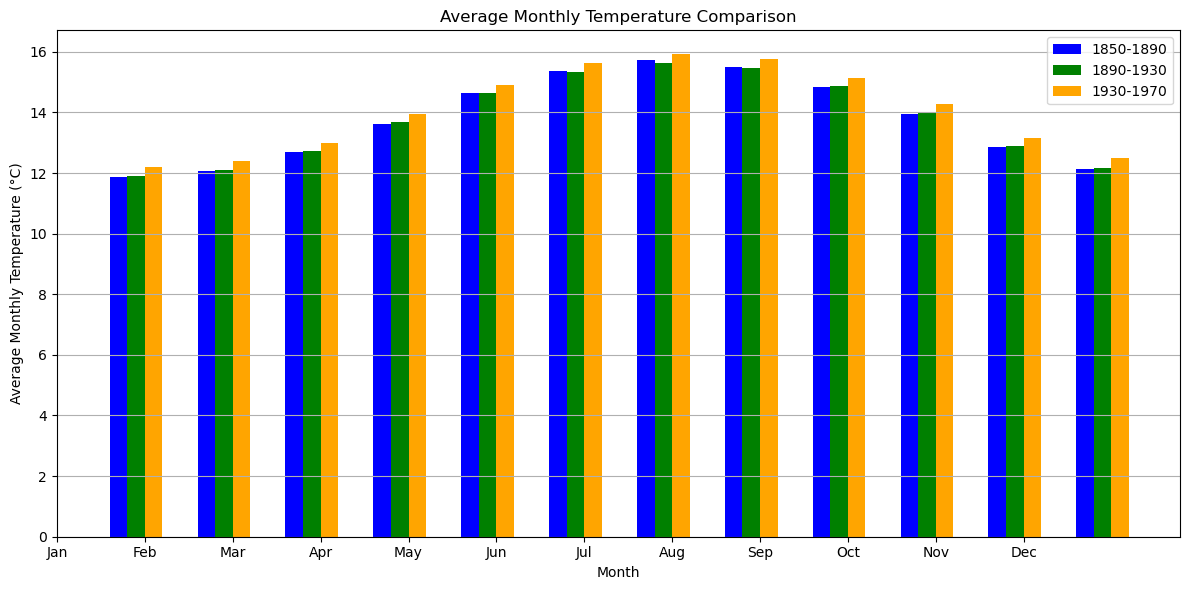

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the data
fname_in = '../data/GAST_BerkeleyEarth_1850-2023.csv'
gast = pd.read_csv(fname_in)
# Function to plot bar chart of average monthly temperatures for different time periods
def plot_monthly_comparison(gast):
    # Filter data for each time period
    gast_1850_1890 = gast[(gast['Year'] >= 1850) & (gast['Year'] <= 1890)]
    gast_1890_1930 = gast[(gast['Year'] >= 1890) & (gast['Year'] <= 1930)]
    gast_1930_1970 = gast[(gast['Year'] >= 1930) & (gast['Year'] <= 1970)]
    
   
    # Calculate average monthly temperatures for each time period
    monthly_means_1850_1890 = gast_1850_1890.groupby('Month')['Monthly Average'].mean()
    monthly_means_1890_1930 = gast_1890_1930.groupby('Month')['Monthly Average'].mean()
    monthly_means_1930_1970 = gast_1930_1970.groupby('Month')['Monthly Average'].mean()
    
   
    # Plotting the bar chart
    plt.figure(figsize=(12, 6))
   
    # Plotting each time period with different colors
    plt.bar(monthly_means_1850_1890.index - 0.3, monthly_means_1850_1890.values, width=0.2, color='blue', label='1850-1890')
    plt.bar(monthly_means_1890_1930.index - 0.1, monthly_means_1890_1930.values, width=0.2, color='green', label='1890-1930')
    plt.bar(monthly_means_1930_1970.index + 0.1, monthly_means_1930_1970.values, width=0.2, color='orange', label='1930-1970')
   
   
    # Customizing the plot
    plt.title('Average Monthly Temperature Comparison')
    plt.xlabel('Month')
    plt.ylabel('Average Monthly Temperature (°C)')
    plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Example: Plotting the comparison for all time periods
plot_monthly_comparison(gast)
